In [2]:
%pip install osmnx numpy networkx folium ipympl


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import osmnx as ox
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np

In [4]:
# Configure OSMnx
ox.settings.use_cache = True
ox.settings.log_console = True

# Output directory
OUTPUT_DIR = Path('datasets/japan/osmnx')
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)
FILENAME = 'japan_railway.graphml'

print(f"Output directory: {OUTPUT_DIR}")

Output directory: datasets/japan/osmnx


## 1. Downloading Japan railway network from OpenStreetMap

In [5]:
print("Downloading Japan railway network from OpenStreetMap...")

G_raw = None

if Path.exists(OUTPUT_DIR / FILENAME):
    print(f"Graph already exists at {OUTPUT_DIR / FILENAME}, loading from file.")
    G_raw = ox.load_graphml(OUTPUT_DIR / FILENAME)
else:
    # Custom filter for railway types (excluding tram, construction, abandoned)
    railway_filter = '["railway"~"rail|subway|light_rail|monorail|narrow_gauge"]'

    # Download the network for Japan
    # Using network_type='all' and custom_filter for railways
    try:
        G_raw = ox.graph_from_place(
            "Japan",
            custom_filter=railway_filter,
            simplify=False,  # Keep all nodes initially
            retain_all=True,
        )
    except Exception as e:
        print(f"Error downloading full Japan: {e}")

if G_raw:
    print(f"Loaded raw graph: {G_raw.number_of_nodes():,} nodes, {G_raw.number_of_edges():,} edges")

Graph already exists at datasets/japan/osmnx/japan_railway.graphml, loading from file.
Loaded raw graph: 802,778 nodes, 1,494,292 edges


In [6]:
# Save using GraphML (recommended - preserves all attributes)
ox.save_graphml(G_raw, filepath=OUTPUT_DIR / FILENAME)

## 2. Visualizing the railway network

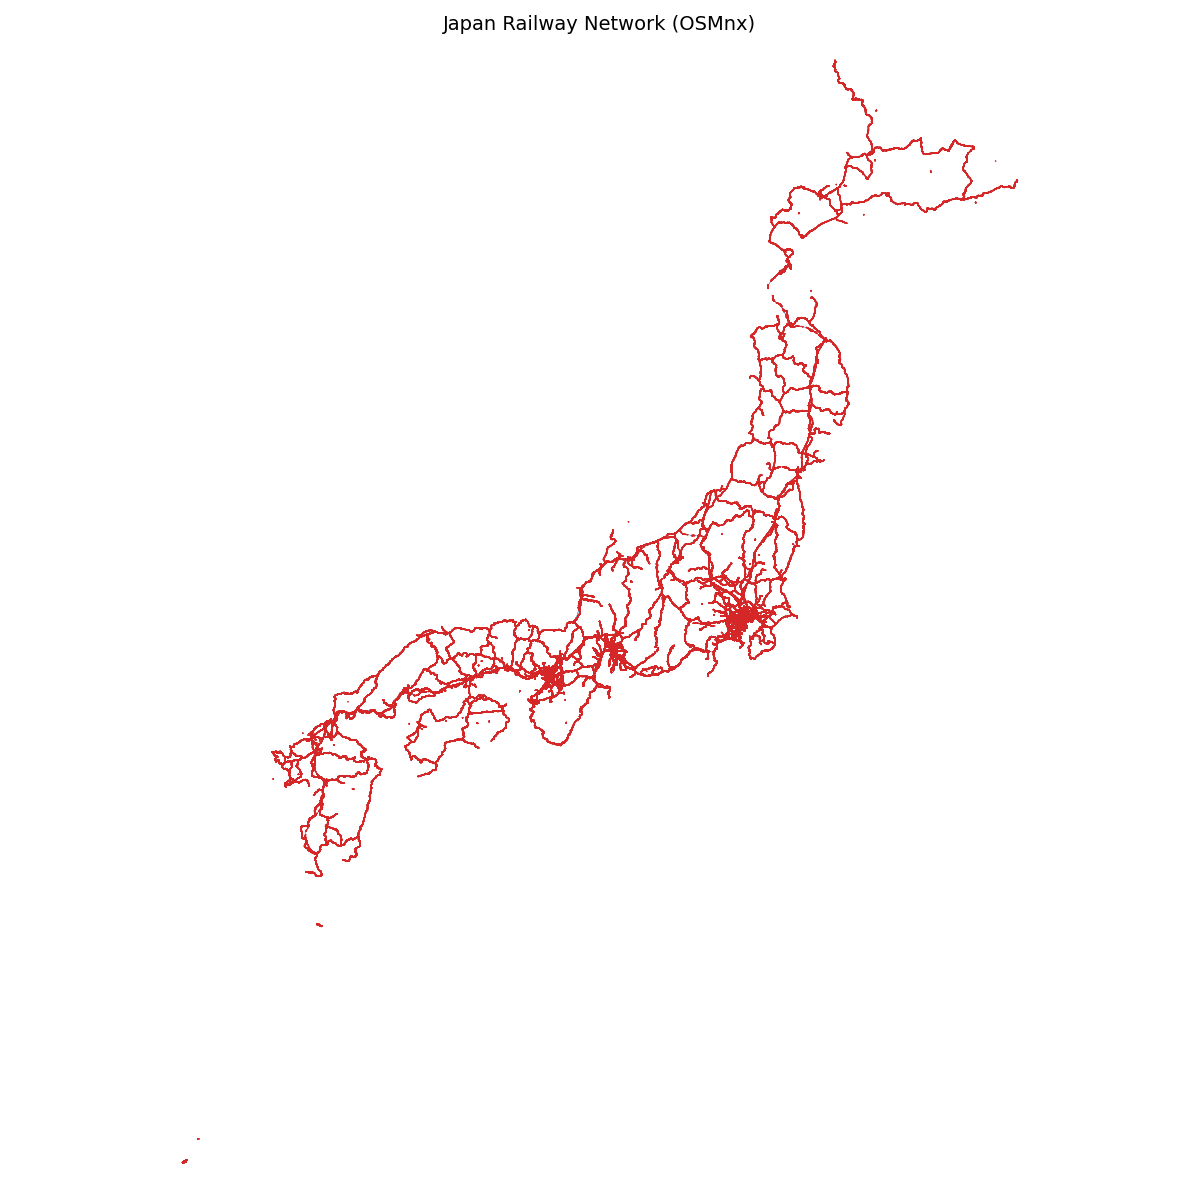

In [11]:
# Enabling interactive plots
%matplotlib widget

# Plot with osmnx - much faster than folium
fig, ax = ox.plot_graph(
    G_raw,
    figsize=(12, 12),
    node_size=1,
    node_color='#d62728',
    edge_color='#4a90d9',
    edge_linewidth=0.3,
    edge_alpha=0.7,
    node_zorder=3,
    bgcolor='white',
    show=False,
    close=False,
)
plt.title("Japan Railway Network (OSMnx)", fontsize=14)
plt.tight_layout()
plt.show()